In [30]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.optimize import curve_fit


Populating the interactive namespace from numpy and matplotlib


O arquivo “dados_osciloscopio.txt”, disponível na página da disciplina contém dados reais de uma medida de tensão (a segunda coluna, em volts) em função do tempo (a primeira coluna, em segundos) feita com um osciloscópio digital ligado a um gerador de sinais programado para gerar um sinal senoidal de frequência 2 Hz. É razoável considerar que o tempo não tenha incerteza e que as medições de tensão tenham incertezas iguais para todos os dados, com valor igual à menor divisão (resolução) das medições de tensão do osciloscópio digital, 𝜎𝑖 = 0.06 𝑉.

In [58]:
dados = np.loadtxt('TEFE24/dados.txt')

t  = dados.T[0] # s
y  = dados.T[1] # Volts
sy = np.repeat(0.06, len(y)) # Volts
df = pd.DataFrame({'tempo (s)': t, 'tensão (V)': y, 'σtensão': sy})

Text(0.5, 0, 'A/D (s)')

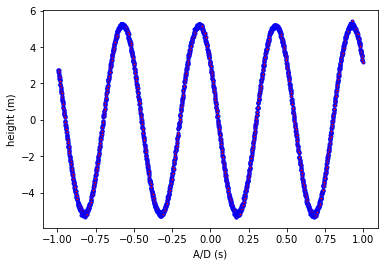

In [85]:
# plot data
errorbar(df['tempo (s)'],df['tensão (V)'],df['σtensão'],fmt='b.', markerfacecolor='r')
ylabel("height (m)")
xlabel("A/D (s)")

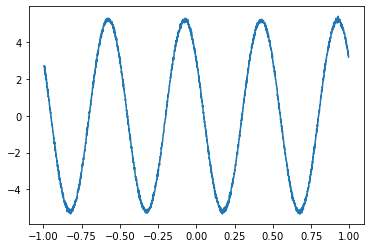

In [86]:
plt.plot(df['tempo (s)'], df['tensão (V)'])

Faça o gráfico de tensão em função do tempo e avalie visualmente se esses dados descrevem uma oscilação senoidal, como sugerido pelas condições experimentais. Escreva uma rotina para ajustar esses dados pelo Método dos Mínimos Quadrados por um modelo que considere uma onda senoidal, isto é, 𝐹(𝑡) = 𝑎1 cos(2𝜋𝑓𝑡) + 𝑎2 sin(2𝜋𝑓𝑡), com 𝑓 = 2 𝐻𝑧. 

[ 2.99012802 -4.26148951] [0.0017011  0.00169305]
covariância:
[[ 2.89372559e-06 -1.36687212e-10]
 [-1.36687212e-10  2.86640404e-06]]


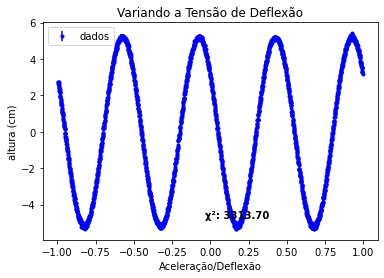

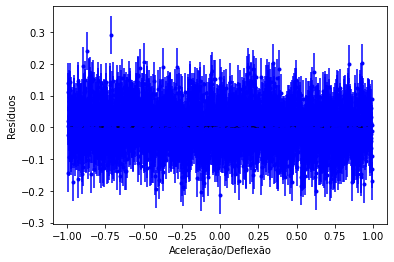

In [110]:
# a simple linear fit

# set up the model
def model(x,a, b):
    f = 2
    return a * np.cos(2 * np.pi * f * x) + b * np.sin(2 * np.pi * f * x)

# do the fit
init_guess = [1, 1]
fit = curve_fit(model, df['tempo (s)'], df['tensão (V)'], sigma=df['σtensão'], p0=init_guess, absolute_sigma=True)

# unpack the results
ans,cov = fit
fit_m = ans
fit_sm = sqrt(diag(cov))

# print the fit results:
print(fit_m,fit_sm)

# plot the data and fit results
errorbar(df['tempo (s)'],df['tensão (V)'],df['σtensão'],fmt='b.', label="dados")
title('Variando a Tensão de Deflexão')
ylabel("altura (cm)")
xlabel("Aceleração/Deflexão")
print("covariância:")
print(cov)

t = linspace(-1, 1)
#plot(t,model(t,fit_m), label="ajuste")
legend()

# compute chi-square
chisq = sum((df['tensão (V)'] - model(df['tempo (s)'],fit_m[0], fit_m[1]))**2/df['σtensão']**2)
figtext(0.5,0.2,"χ²: %.2f"%chisq,fontweight="bold")
plt.savefig('data_1_values', dpi=250)



# make a residuals plot
figure()
errorbar(df['tempo (s)'],df['tensão (V)']-model(df['tempo (s)'],fit_m[0], fit_m[1]),df['σtensão'],fmt='b.')
hlines(0,df['tempo (s)'].min(),df['tempo (s)'].max())
ylabel("Resíduos")
xlabel("Aceleração/Deflexão")
plt.savefig('data_1_residuals', dpi=250)

[ 2.99012802 -4.26148951] [0.0017011  0.00169305]
covariância:
[[ 2.89372559e-06 -1.36687212e-10]
 [-1.36687212e-10  2.86640404e-06]]


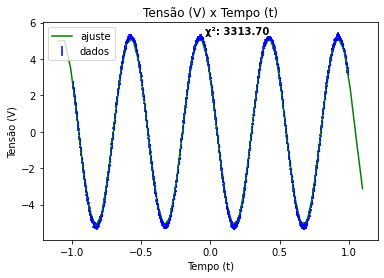

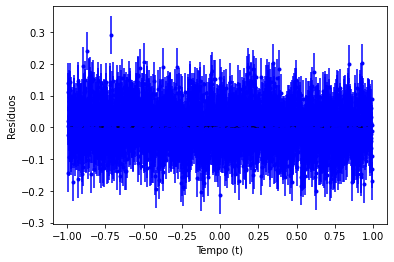

In [135]:
def model(x,a, b):
    f = 2
    return a * np.cos(2 * np.pi * f * x) + b * np.sin(2 * np.pi * f * x)

init_guess = [1, 1]
pars, cov = curve_fit(f=model, xdata=df['tempo (s)'], ydata=df['tensão (V)'], p0=init_guess)
fit_sm = sqrt(diag(cov))

# unpack the results
ans,cov = fit
fit_m = ans
fit_sm = sqrt(diag(cov))

# print the fit results:
print(fit_m,fit_sm)

# plot the data and fit results
errorbar(df['tempo (s)'],df['tensão (V)'],df['σtensão'],fmt='b.', label="dados", ms=0.5)
title('Tensão (V) x Tempo (t)')
ylabel("Tensão (V)")
xlabel("Tempo (t)")
print("covariância:")
print(cov)

t = linspace(-1.1, 1.1)
plot(t,model(t,fit_m[0], fit_m[1]), label="ajuste", color='green')
legend()

# compute chi-square
chisq = sum((df['tensão (V)'] - model(df['tempo (s)'],fit_m[0], fit_m[1]))**2/df['σtensão']**2)
figtext(0.5,0.84,"χ²: %.2f"%chisq,fontweight="bold")
plt.savefig('data_2_values', dpi=250)


# make a residuals plot
figure()
errorbar(df['tempo (s)'],df['tensão (V)']-model(df['tempo (s)'],fit_m[0], fit_m[1]),df['σtensão'],fmt='b.')
hlines(0,df['tempo (s)'].min(),df['tempo (s)'].max())
ylabel("Resíduos")
xlabel("Tempo (t)")
plt.savefig('data_2_residuals', dpi=250)

a) Obtenha o valor dos parâmetros ajustados 𝑎̃1 e 𝑎̃2 com suas respectivas incertezas.


In [141]:
print(fit_m, fit_sm)

[ 2.99012802 -4.26148951] [0.0017011  0.00169305]


b) Determine a covariância, 𝑐𝑜𝑣(𝑎̃1 , 𝑎̃2 ), e o coeficiente de correlação, 𝜌 𝑎̃1,𝑎̃2 = 𝑐𝑜𝑣(𝑎̃1,𝑎̃2) 𝜎𝑎̃1 𝜎𝑎̃2 , entre os parâmetros ajustados. Use 3 algarismos significativos para a covariância (se possível) e 3 casas decimais para o coeficiente de correlação.

In [148]:
cov

array([[ 2.89372559e-06, -1.36687212e-10],
       [-1.36687212e-10,  2.86640404e-06]])

In [147]:
np.corrcoef(cov)

array([[ 1., -1.],
       [-1.,  1.]])